In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ruta='/content/drive/MyDrive/'
archivo='API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls'
df=pd.read_excel(ruta+archivo,header=3)
df.head()

In [ ]:
df.shape

(264, 65)

# Visualización de datos faltantes

## Mapa de calor

In [ ]:
df_nan=df.isna()
plt.figure(figsize=(3,10))
plt.imshow(df_nan,cmap='gray')

## Matriz de co-ocurrencia

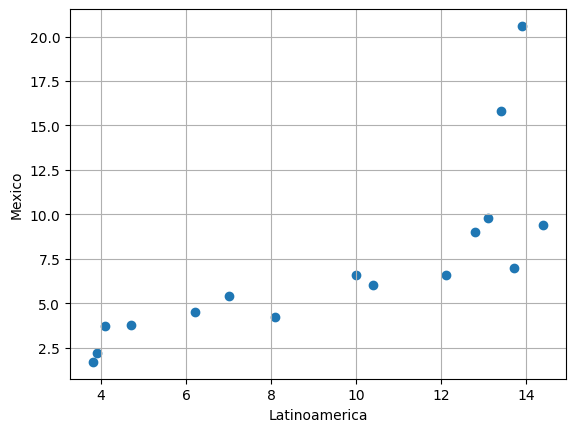

In [ ]:
# Suponemos que las variables 'Latinoamerica' (LCN) y 'Mexico' (MEX) están correlacionadas
#
# Primero identificamos los renglones en donde tenemos los código 'LCN' y 'MEX' y despues... eeeehhh, eliminamos las columnas
LCN=df[df['Country Code']=='LCN'].iloc[0,4:]
MEX=df[df['Country Code']=='MEX'].iloc[0,4:]

plt.scatter(LCN,MEX)
plt.xlabel('Latinoamerica')
plt.ylabel('Mexico')
plt.grid()

In [ ]:
# Cambiamos los np.NaN por 'NaN' para visualizarlos
LCN.fillna('NaN',inplace=True)
MEX.fillna('NaN',inplace=True)
pd.crosstab(LCN,MEX)

152,1.7,2.2,3.7,3.8,4.2,4.5,5.4,6.0,6.6,7.0,9.0,9.4,9.8,15.8,20.6,NaN
132,,,,,,,,,,,,,,,,
3.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Tratamiento de datos faltantes

Los `NaN` a tratar son los relacionados con otros `NaN` (los 23 de la tabla de co-ocurrencia), o los `NaN` de las variables que no se correlacionan. Este último caso hace referencia a los datos perdidos completamente al azar.

Notita: _Si existe una variable correlacionada para la imputación de datos, este caso se trata de datos perdidos al azar_.

## Eliminación de datos

In [ ]:
df.dropna() # Elimina las filas que tengan al menos un NaN

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [ ]:
df_nan=df.dropna(thresh=6) # Elimina las filas (variables) que tengan menos de 6 valores

# Vamo a ver
df_nan=df_nan.isna()
plt.imshow(df_nan,cmap='gray')

In [ ]:
# Podemos eliminar las filas que tengan solo NaNs
df.dropna(how='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN,NaN,NaN


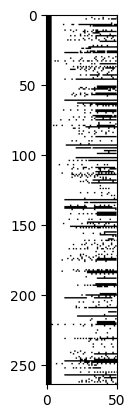

In [ ]:
# Aplicamos este último criterio a las columnas (observaciones)
df_obs=df.dropna(how='all',axis=1)
df_obsNaN=df_obs.isna()
plt.imshow(df_obsNaN,cmap='gray')

In [ ]:
# Eliminar las observaciones (columnas) que tengan solo NaN y las variables (filas) que tengan menos de 6 valores
#
df_var=df.dropna(thresh=6)
df_obsVar=df_var.dropna(how='all',axis=1)
df_nan=df_obsVar.isna()
plt.figure(figsize=(3,10))
plt.imshow(df_nan,cmap='gray')

In [ ]:
df_obsVar # Las observaciones empiezan en 1967 y las variables en el index 2

,Country Name,Country Code,Indicator Name,Indicator Code,1967,1969,1971,1974,1975,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
7,Argentina,ARG,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4
11,Australia,AUS,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.3,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,2.5,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN
260,"Yemen, Rep.",YEM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.2,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.8,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN


In [ ]:
df_obsVar.shape,df.shape

((168, 51), (264, 65))

## Imputación de datos

In [2]:
import numpy as np
import pandas as pd

np.random.seed(123)
df=pd.DataFrame(np.random.randn(100,2)+np.random.rand(2),columns=['A','B'])
df['C']=np.random.uniform(-2,3,100)
df['D']=np.round(np.random.randn(100),0)
nansA=[25,27,29,31,33]
nansB=np.random.randint(99,size=np.random.randint(20))
nansC=np.random.randint(99,size=np.random.randint(20))
nansD=np.random.randint(99,size=np.random.randint(20))
df.loc[nansA,'A']=np.NaN
df.iloc[nansB,1]=np.NaN
df.loc[nansC,'C']=np.NaN
df.iloc[nansD,3]=np.NaN
df.isna().sum()

,0
A,5
B,6
C,16
D,16


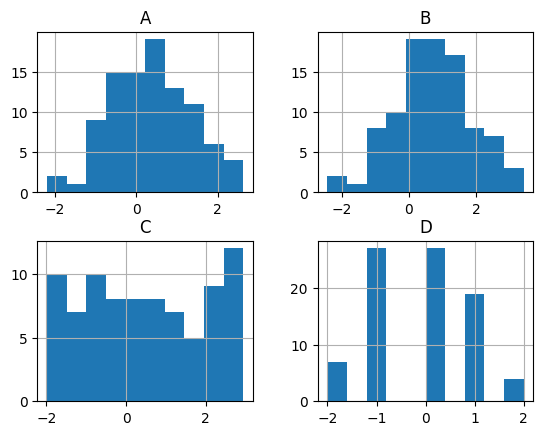

In [ ]:
H=df.hist()

<Axes: >

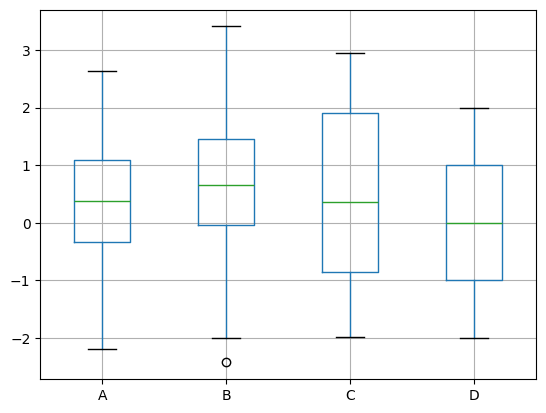

In [ ]:
df.boxplot() # Tenemos un atípico por ahí

El objetivo de imputar los datos perdidos es que las medidas representativas de las variables se conserven.

In [ ]:
#@title Imputación usando la media aritmética y la mediana
ma=df.mean()
ma

,0
A,0.369786
B,0.683401
C,0.464562
D,-0.166667


In [ ]:
df_ma=df.fillna(ma) # Si queremos sobrescribir la variable, asignamos el argumento 'inplace=True'
df_ma.isna().sum()

,0
A,0
B,0
C,0
D,0


In [ ]:
df_ma.mean()-df.mean() # La media se mantiene

,0
A,0.000000e+00
B,0.000000e+00
C,0.000000e+00
D,-2.775558e-17


In [ ]:
df_ma.std()-df.std() # La std se reduce

,0
A,-0.025349
B,-0.034935
C,-0.129534
D,-0.086706


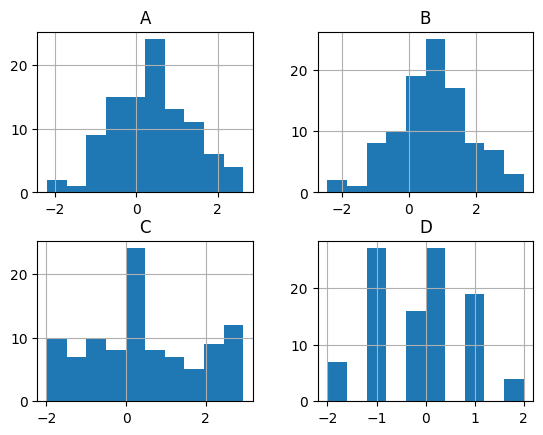

In [ ]:
H=df_ma.hist() # Deformación en el histograma

Si tenemos una distribución Uniforme (como en **C**) o si tenemos una variable discreta (como **D**), no nos conviene usar este valor de imputación.

Además, como la media aritmética se ve afectada por datos atípicos (como en **B**), optamos por usar la mediana.

In [ ]:
me=df.median()
me

,0
A,0.372277
B,0.657914
C,0.367046
D,-0.000000


In [ ]:
df_me=df.fillna(me)
df_me.median()-df.median() # La mediana se mantiene

,0
A,0.0
B,0.0
C,0.0
D,0.0


In [ ]:
df_me.std()-df.std() # La std se reduce

,0
A,-0.025349
B,-0.034918
C,-0.129075
D,-0.084705


In [ ]:
#@title Sustitución usando la moda
mo=df.mode()
mo

,A,B,C,D
0,-2.188429,-2.423264,-1.982339,-1.0
1,-1.884850,-1.990798,-1.972273,-0.0
2,-1.533283,-1.749264,-1.970286,NaN
3,-1.173639,-1.217255,-1.961312,NaN
4,-1.132699,-1.170097,-1.919407,NaN
...,...,...,...,...
90,1.981962,2.613761,NaN,NaN
91,2.197661,2.994577,NaN,NaN
92,2.325363,3.045934,NaN,NaN
93,2.444180,3.406095,NaN,NaN


In [ ]:
# Como no sabemos la cantidad de elementos repetidos en la moda, aseguramos al menos uno,
# escogiendo el primero de ellos (o el único)
mo.loc[0]

,0
A,-2.188429
B,-2.423264
C,-1.982339
D,-1.000000


En variables numéricas continuas, nos regresa el valor más pequeño de los que más se repiten. Esto genera un sesgo más negativo.

In [ ]:
df_mo=df.fillna(mo.loc[0])
df_mo.skew()-df.skew() # El sesgo se reduce en variables numéricas continuas

,0
A,-0.281058
B,-0.321301
C,0.198893
D,0.307394


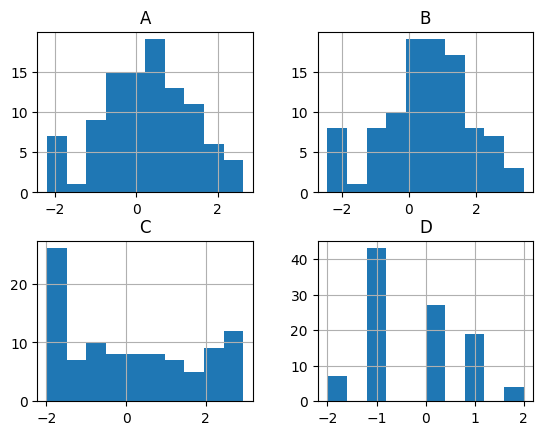

In [ ]:
H=df_mo.hist()

In [ ]:
#@title Sustitución aleatoria
#
# Escogemos un valor aleatorio que pertenezca a la muestra y lo usamos para sustituír todos
# Primero para 'A'
valor_aleatorio=np.random.choice(df['A'].dropna())
valor_aleatorio

1.4004539548119412

In [ ]:
df_ale=df.copy()
df_ale['A']=df['A'].fillna(valor_aleatorio)
df_ale.isna().sum()

,0
A,0
B,6
C,16
D,16


In [ ]:
# Ahora para todas las variables
df_ale=df.apply(lambda x: x.fillna(np.random.choice(x.dropna())),axis=0)
df_ale.isna().sum()

,0
A,0
B,0
C,0
D,0


In [ ]:
# Escogemos tantos valores aleatorios como valores perdidos tengamos y los sustituímos
#
# Identificamos la cantidad de valores perdidos por variable
N=df.isna().sum()
N

,0
A,5
B,6
C,16
D,16


In [ ]:
# Escogemos 'N' valores aleatorios por variable
np.random.choice(df['A'].dropna(),N['A']) # Para 'A'

array([ 0.90390334, -0.31067051,  1.1453551 , -0.50256387,  1.1453551 ])

In [ ]:
# Índices de los NaNs de 'A'
df[df['A'].isna().values].index

Index([25, 27, 29, 31, 33], dtype='int64')

In [ ]:
nans=df[df['A'].isna().values].index
df.loc[nans,'A']=np.random.choice(df['A'].dropna(),N['A'])
df.isna().sum()

,0
A,0
B,6
C,16
D,16


In [ ]:
df_copy=df.copy()
N=df.isna().sum()
for var in df:
  nans=df[df[var].isna().values].index
  df_copy.loc[nans,var]=np.random.choice(df[var].dropna(),N[var])
df_copy.isna().sum()

,0
A,0
B,0
C,0
D,0


## Usando librerías

In [1]:
from sklearn.impute import SimpleImputer

In [3]:
imputador=SimpleImputer() # Sustitución usando la media. strategy='median', 'most_frequent'
arr_ma=imputador.fit_transform(df)        # Regresa un arreglo de numpy
df_imputado=pd.DataFrame(arr_ma,columns=df.columns)
df_imputado.isna().sum()

,0
A,0
B,0
C,0
D,0


In [5]:
%%bash
pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.7 MB/s eta 0:00:00


In [6]:
!pip install feature-engine

In [7]:
from feature_engine.imputation import RandomSampleImputer

In [8]:
imputador=RandomSampleImputer()
df_imputado=imputador.fit_transform(df)
df_imputado.isna().sum()

,0
A,0
B,0
C,0
D,0


In [10]:
df.loc[nansA,'A'] # En 'nansA' están los NaN

,A
25,NaN
27,NaN
29,NaN
31,NaN
33,NaN


In [9]:
df_imputado.loc[nansA,'A'] # Todos los NaN imputados son diferentes

,A
25,-0.846318
27,1.165712
29,-0.960051
31,0.576839
33,0.213624


In [14]:
# Sustituyendo solo la variable 'C'
imputador=RandomSampleImputer(variables=['C'])
df_imputado=imputador.fit_transform(df)
df_imputado.isna().sum()

,0
A,5
B,6
C,0
D,16


In [15]:
# Imputación para la variable 'A' (Normal sin atípicos): Media
# Imputación para 'B' (Normal con atípicos): Mediana
# Imputación para 'D' (Discreta): Moda
valores_imputables={'A':df.A.mean(),'B':df.B.median(),'D':df.D.mode().loc[0]}
df_imputado=df_imputado.fillna(valores_imputables)
df_imputado.isna().sum()

,0
A,0
B,0
C,0
D,0
